In [151]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [152]:
df=pd.read_csv('anime.csv')
df.head()

,MAL_ID,Name,Score,Genres,English name,Unnamed: 5,Type,Episodes,Aired,Premiered,...,Unnamed: 14,Rating,Ranked,Popularity,Unnamed: 18,Favorites,Watching,Completed,Unnamed: 22,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,NaN,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,NaN,R - 17+ (violence & profanity),28,39,NaN,61971,105808,718161,NaN,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,NaN,Movie,1,1-Sep-01,Unknown,...,NaN,R - 17+ (violence & profanity),159,518,NaN,1174,4143,208333,NaN,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,NaN,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,NaN,PG-13 - Teens 13 or older,266,201,NaN,12944,29113,343492,NaN,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,NaN,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,NaN,PG-13 - Teens 13 or older,2481,1467,NaN,587,4300,46165,NaN,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,NaN,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,NaN,PG - Children,3710,4369,NaN,18,642,7314,NaN,1108


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MAL_ID        17562 non-null  int64  
 1   Name          17562 non-null  object 
 2   Score         17562 non-null  object 
 3   Genres        17562 non-null  object 
 4   English name  17562 non-null  object 
 5   Unnamed: 5    0 non-null      float64
 6   Type          17562 non-null  object 
 7   Episodes      17562 non-null  object 
 8   Aired         17562 non-null  object 
 9   Premiered     17562 non-null  object 
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Studios       17562 non-null  object 
 13  Source        17562 non-null  object 
 14  Unnamed: 14   0 non-null      float64
 15  Rating        17562 non-null  object 
 16  Ranked        17562 non-null  object 
 17  Popularity    17562 non-null  int64  
 18  Unnamed: 18   0 non-null  

In [154]:
df.isnull().sum()

MAL_ID              0
Name                0
Score               0
Genres              0
English name        0
Unnamed: 5      17562
Type                0
Episodes            0
Aired               0
Premiered           0
Unnamed: 10     17562
Unnamed: 11     17562
Studios             0
Source              0
Unnamed: 14     17562
Rating              0
Ranked              0
Popularity          0
Unnamed: 18     17562
Favorites           0
Watching            0
Completed           0
Unnamed: 22     17562
Dropped             0
dtype: int64

In [155]:
df.isnull().sum()/len(df)*100

MAL_ID            0.0
Name              0.0
Score             0.0
Genres            0.0
English name      0.0
Unnamed: 5      100.0
Type              0.0
Episodes          0.0
Aired             0.0
Premiered         0.0
Unnamed: 10     100.0
Unnamed: 11     100.0
Studios           0.0
Source            0.0
Unnamed: 14     100.0
Rating            0.0
Ranked            0.0
Popularity        0.0
Unnamed: 18     100.0
Favorites         0.0
Watching          0.0
Completed         0.0
Unnamed: 22     100.0
Dropped           0.0
dtype: float64

In [156]:
df.drop(['Unnamed: 5','Unnamed: 10','Unnamed: 11','Unnamed: 14','Unnamed: 18','Unnamed: 22'],axis=1,inplace=True)

In [157]:
df.shape

(17562, 18)

In [158]:
df.head()

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Studios,Source,Rating,Ranked,Popularity,Favorites,Watching,Completed,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Sunrise,Original,R - 17+ (violence & profanity),28,39,61971,105808,718161,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,1-Sep-01,Unknown,Bones,Original,R - 17+ (violence & profanity),159,518,1174,4143,208333,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Madhouse,Manga,PG-13 - Teens 13 or older,266,201,12944,29113,343492,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,Sunrise,Original,PG-13 - Teens 13 or older,2481,1467,587,4300,46165,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,Toei Animation,Manga,PG - Children,3710,4369,18,642,7314,1108


In [159]:
df.Rating.unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai',
       'Unknown'], dtype=object)

In [160]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MAL_ID,17562.0,21477.192347,14900.093170,1.0,5953.5,22820.0,35624.75,48492.0
Popularity,17562.0,8763.452340,5059.327278,0.0,4383.5,8762.5,13145.00,17565.0
Favorites,17562.0,457.746270,4063.473313,0.0,0.0,3.0,31.00,183914.0
Watching,17562.0,2231.487758,14046.688133,0.0,13.0,73.0,522.00,887333.0
Completed,17562.0,22095.571347,91009.188504,0.0,111.0,817.5,6478.00,2182587.0
Dropped,17562.0,1176.599533,4740.348653,0.0,37.0,77.0,271.00,174710.0


In [161]:
df['Aired'].value_counts()

Unknown                        309
2005                            57
2004                            49
2021 to ?                       46
2003                            46
                              ... 
11-Dec-09                        1
Apr 3, 2010 to Sep 25, 2010      1
Apr 4, 2010 to Sep 26, 2010      1
1-Oct-81                         1
Mar 17, 2021 to ?                1
Name: Aired, Length: 11936, dtype: int64

In [164]:
df['Premiered'].value_counts()

Unknown        12817
Spring 2017       86
Fall 2016         79
Spring 2018       77
Spring 2016       74
               ...  
Winter 1974        1
Summer 1986        1
Winter 1963        1
Winter 1985        1
Winter 1970        1
Name: Premiered, Length: 231, dtype: int64

In [233]:
df.head()

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Studios,Source,Rating,Ranked,Popularity,Favorites,Watching,Completed,Dropped,Season,Year
0,1,Cowboy Bebop,8.78,"[Action, Adventure, Comedy, Drama, Sci-Fi,...",Cowboy Bebop,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Sunrise,Original,R - 17+ (violence & profanity),28,39,61971,105808,718161,26678,Spring,1998
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"[Action, Drama, Mystery, Sci-Fi, Space]",Cowboy Bebop:The Movie,Movie,1,1-Sep-01,Unknown,Bones,Original,R - 17+ (violence & profanity),159,518,1174,4143,208333,770,Unknown,0
2,6,Trigun,8.24,"[Action, Sci-Fi, Adventure, Comedy, Drama,...",Trigun,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Madhouse,Manga,PG-13 - Teens 13 or older,266,201,12944,29113,343492,13925,Spring,1998
3,7,Witch Hunter Robin,7.27,"[Action, Mystery, Police, Supernatural, Dr...",Witch Hunter Robin,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,Sunrise,Original,PG-13 - Teens 13 or older,2481,1467,587,4300,46165,5378,Summer,2002
4,8,Bouken Ou Beet,6.98,"[Adventure, Fantasy, Shounen, Supernatural]",Beet the Vandel Buster,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,Toei Animation,Manga,PG - Children,3710,4369,18,642,7314,1108,Fall,2004


In [165]:
df['Type'].value_counts()

TV         4996
OVA        3894
Movie      3041
Special    2218
ONA        1907
Music      1469
Unknown      37
Name: Type, dtype: int64

In [166]:
df[df['Type'] == 'Movie'].head(3)

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Studios,Source,Rating,Ranked,Popularity,Favorites,Watching,Completed,Dropped
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,1-Sep-01,Unknown,Bones,Original,R - 17+ (violence & profanity),159,518,1174,4143,208333,770
21,31,Neon Genesis Evangelion: Death & Rebirth,7.45,"Drama, Mecha, Psychological, Sci-Fi",Neon Genesis Evangelion:Death & Rebirth,Movie,1,15-Mar-97,Unknown,"Gainax, Production I.G",Original,R - 17+ (violence & profanity),1742,833,588,1941,146202,961
22,32,Neon Genesis Evangelion: The End of Evangelion,8.51,"Sci-Fi, Dementia, Psychological, Drama, Mecha",Neon Genesis Evangelion:The End of Evangelion,Movie,1,19-Jul-97,Unknown,"Gainax, Production I.G",Original,R+ - Mild Nudity,102,195,17811,8055,482918,1499


In [167]:
df['Premiered'].str.match('(Spring|Summer|Fall|Winter) [0-9]{4}').sum()

4745

In [168]:
df['Season'] = df['Premiered'].str.split(pat=' ', expand=True)[0]
df['Season'].value_counts().reset_index()

,index,Season
0,Unknown,12817
1,Spring,1611
2,Fall,1389
3,Winter,942
4,Summer,803


In [169]:
df['Score'].value_counts()

Unknown    5141
6.48         74
6.3          72
6.31         72
6.52         71
           ... 
3.19          1
4.2           1
4.35          1
3.32          1
4.06          1
Name: Score, Length: 533, dtype: int64

In [170]:
df['Score']=df['Score'].replace('Unknown',0).astype(float)

In [171]:
def split_labels(series):
    series = series.split(",")
    if "Unknown" in series:
        series.remove("Unknown")
    return series

df["Genres"] = df["Genres"].map(split_labels)

In [172]:
df.sort_values('Score',ascending=False).head(5)

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Studios,Source,Rating,Ranked,Popularity,Favorites,Watching,Completed,Dropped,Season
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"[Action, Military, Adventure, Comedy, Dram...",Fullmetal Alchemist:Brotherhood,TV,64,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Bones,Manga,R - 17+ (violence & profanity),1,3,183914,171871,1644938,32456,Spring
15926,40028,Shingeki no Kyojin: The Final Season,9.17,"[Action, Military, Mystery, Super Power, D...",Attack on Titan Final Season,TV,16,"Dec 7, 2020 to ?",Winter 2021,MAPPA,Manga,R - 17+ (violence & profanity),2,119,44862,566239,553,2090,Winter
5683,9253,Steins;Gate,9.11,"[Thriller, Sci-Fi]",Steins;Gate,TV,24,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,White Fox,Visual novel,PG-13 - Teens 13 or older,3,9,148452,114349,1134756,35600,Spring
14963,38524,Shingeki no Kyojin Season 3 Part 2,9.10,"[Action, Drama, Fantasy, Military, Mystery...",Attack on Titan Season 3 Part 2,TV,10,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,Wit Studio,Manga,R - 17+ (violence & profanity),4,63,40985,54607,906824,3099,Spring
9913,28977,Gintama°,9.10,"[Action, Comedy, Historical, Parody, Samur...",Gintama Season 4,TV,51,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,5,329,11868,48011,167130,11472,Spring


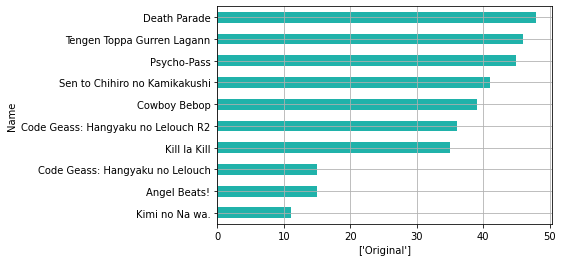

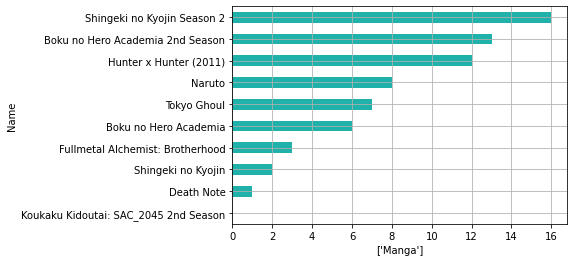

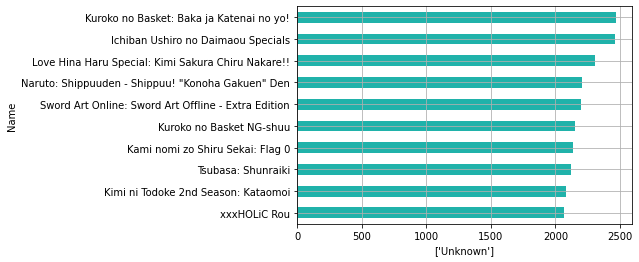

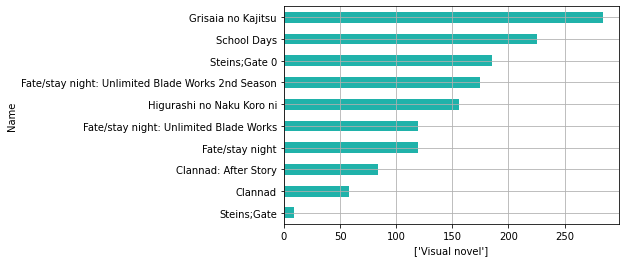

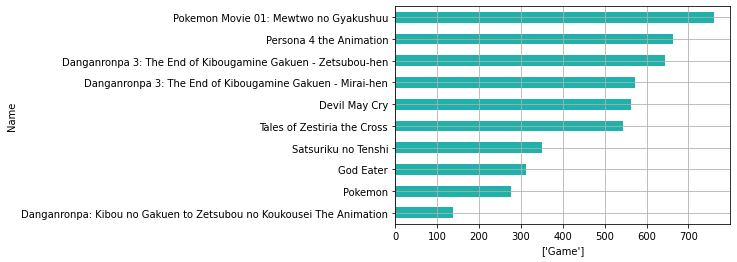

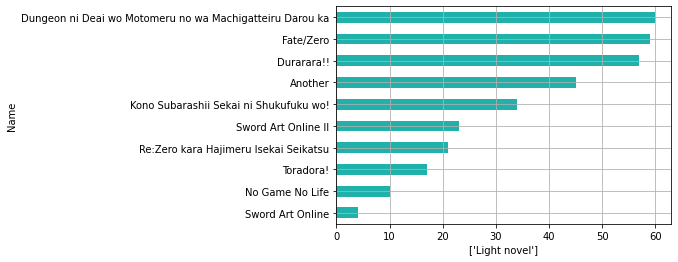

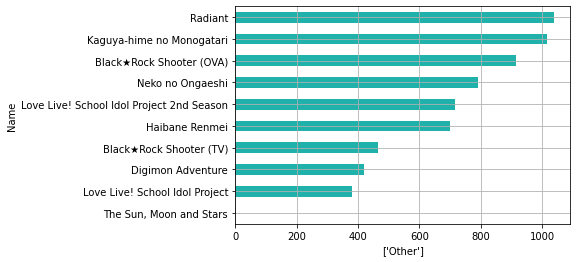

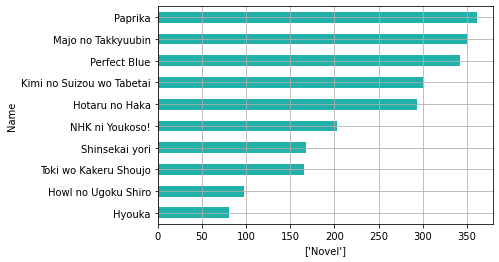

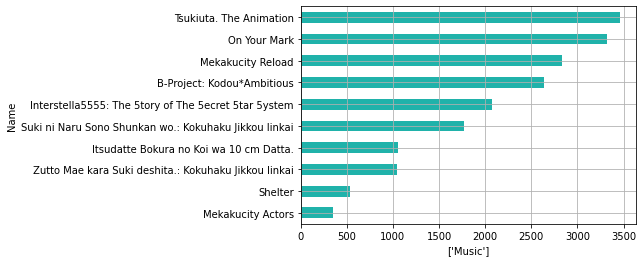

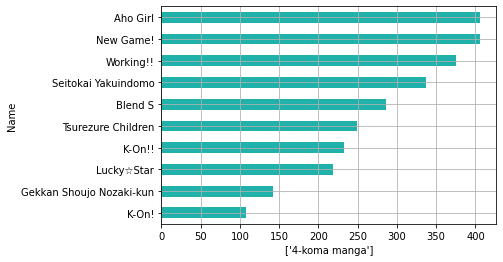

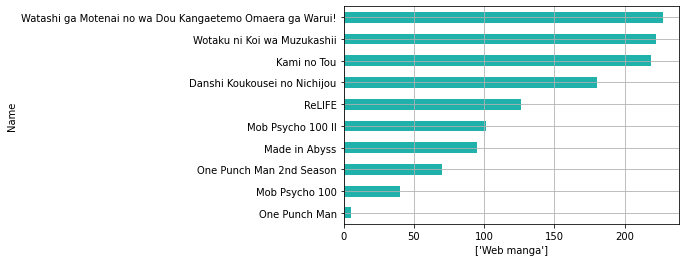

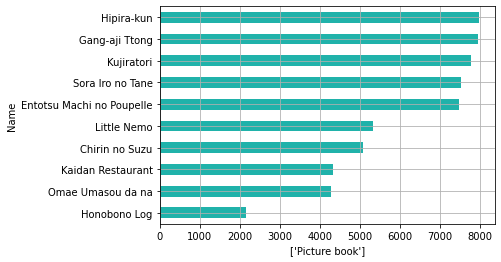

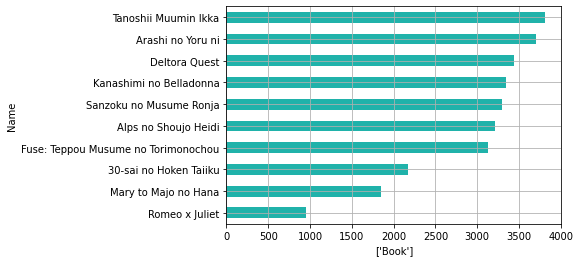

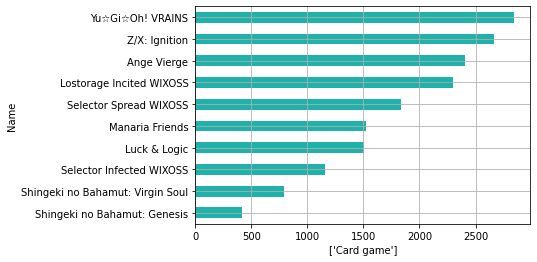

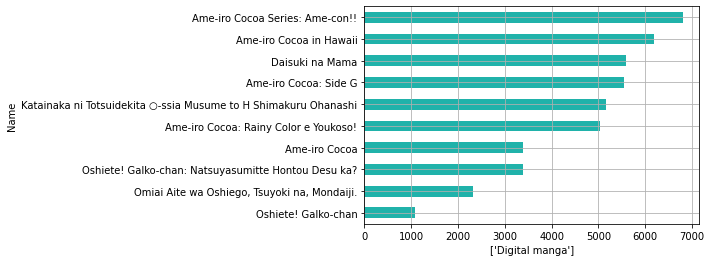

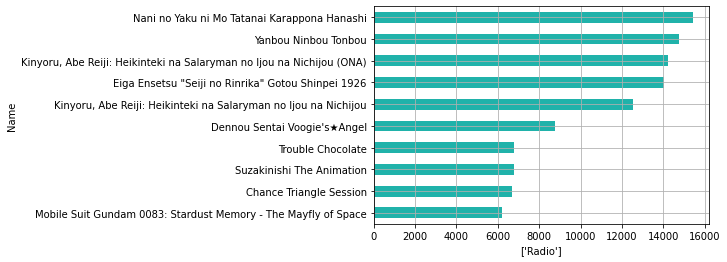

In [176]:
sour = df.sort_values(by= 'Popularity').groupby('Source')[['Name','Popularity']]

for i in  df['Source'].value_counts().index:
    bar = sour.get_group(i)
    bar.set_index('Name',inplace=True)
    bar.head(10).plot(kind='barh',legend =False,color = 'lightseagreen')
    plt.xlabel([i])
    plt.grid()
    
plt.show()


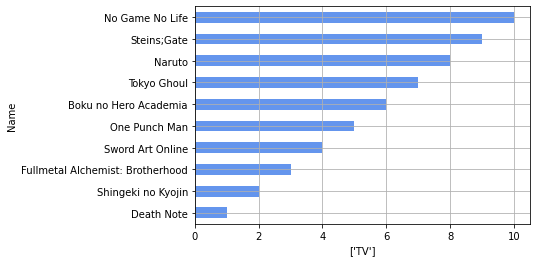

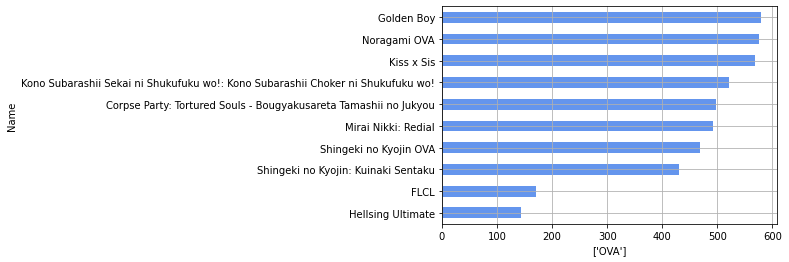

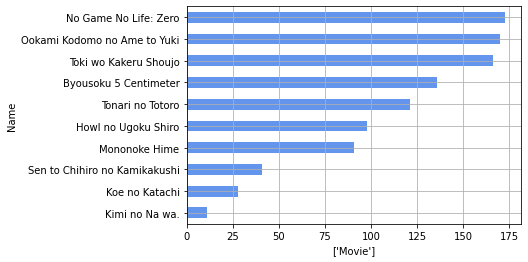

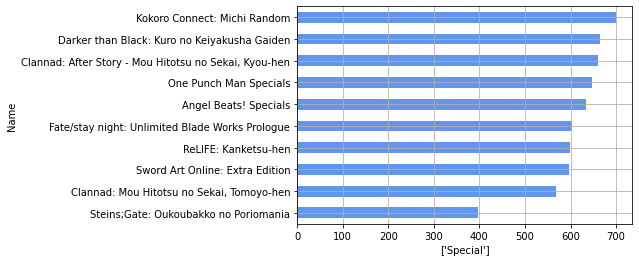

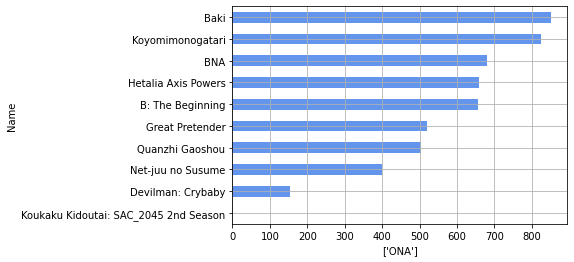

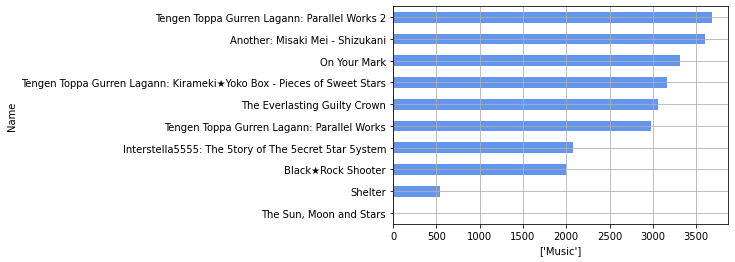

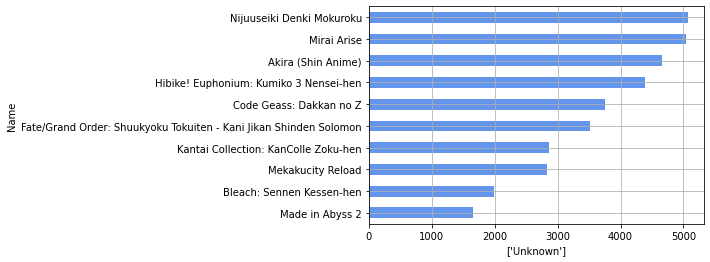

In [174]:
typ = df.sort_values(by= 'Popularity').groupby('Type')[['Name','Popularity']]

for i in  df['Type'].value_counts().index:
    bar = typ.get_group(i)
    bar.set_index('Name',inplace=True)
    bar.head(10).plot(kind='barh',legend =False,color = 'cornflowerblue')
    plt.xlabel([i])
    plt.grid()
    
plt.show()

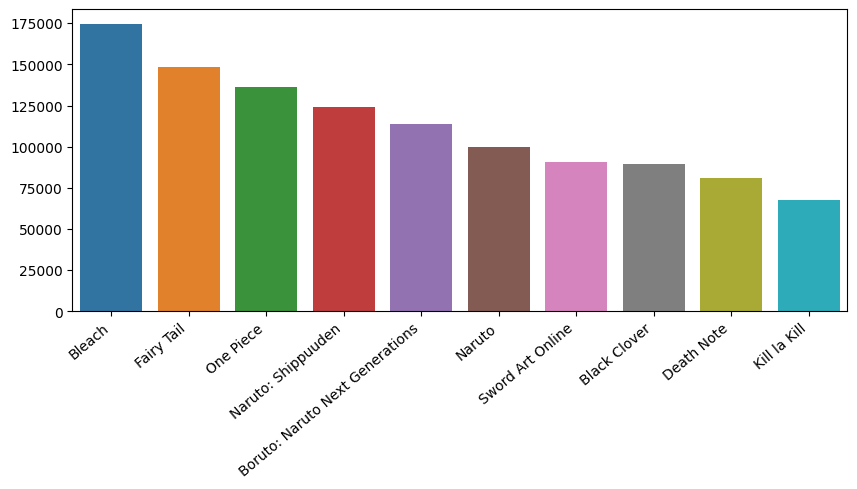

In [182]:
drop = df[['Name','Dropped']].sort_values(by = 'Dropped',ascending =False).head(10)
plt.figure(figsize=(10,4), dpi = 100)
sns.barplot(x=drop['Name'].unique(),y=drop['Dropped'].unique(), data=drop)
plt.xticks(rotation=40, ha = 'right')
plt.show()

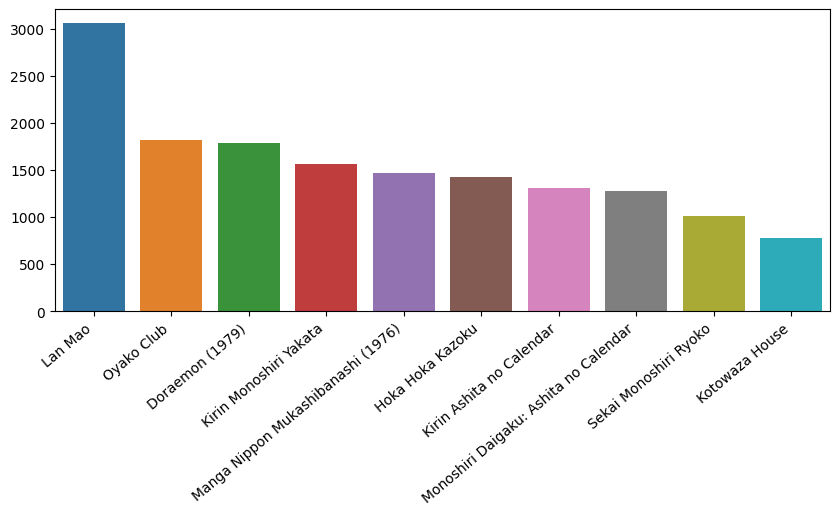

In [183]:
df['Episodes'] = df['Episodes'].replace('Unknown', 0).astype(str).astype(int)
epi = df[['Name','Episodes']].sort_values(by = 'Episodes',ascending =False).head(10)
plt.figure(figsize=(10,4), dpi = 100)
sns.barplot(x=epi['Name'].unique(),y=epi['Episodes'].unique(), data=epi)
plt.xticks(rotation=40, ha = 'right')
plt.show()

In [235]:
df.sort_values('Completed',ascending=False).head(5)

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Studios,Source,Rating,Ranked,Popularity,Favorites,Watching,Completed,Dropped,Season,Year
7449,16498,Shingeki no Kyojin,8.48,"[Action, Military, Mystery, Super Power, D...",Attack on Titan,TV,25,"Apr 7, 2013 to Sep 29, 2013",Spring 2013,Wit Studio,Manga,R - 17+ (violence & profanity),115,2,129844,140753,2182587,44635,Spring,2013
1393,1535,Death Note,8.63,"[Mystery, Police, Psychological, Supernatur...",Death Note,TV,37,"Oct 4, 2006 to Jun 27, 2007",Fall 2006,Madhouse,Manga,R - 17+ (violence & profanity),60,1,145201,122401,2146116,80834,Fall,2006
6614,11757,Sword Art Online,7.25,"[Action, Game, Adventure, Romance, Fantasy]",Sword Art Online,TV,25,"Jul 8, 2012 to Dec 23, 2012",Summer 2012,A-1 Pictures,Light novel,PG-13 - Teens 13 or older,2584,4,66342,80304,1907261,90661,Summer,2012
10451,30276,One Punch Man,8.57,"[Action, Sci-Fi, Comedy, Parody, Super Pow...",One Punch Man,TV,12,"Oct 5, 2015 to Dec 21, 2015",Fall 2015,Madhouse,Web manga,R - 17+ (violence & profanity),81,5,54435,96568,1841220,26755,Fall,2015
11185,31964,Boku no Hero Academia,8.11,"[Action, Comedy, School, Shounen, Super Po...",My Hero Academia,TV,13,"Apr 3, 2016 to Jun 26, 2016",Spring 2016,Bones,Manga,PG-13 - Teens 13 or older,400,6,50005,90902,1655900,19212,Spring,2016


In [234]:
anime_year = pd.DataFrame(df.groupby('Year').count()['MAL_ID']).reset_index()
anime_year.head()

,Year,MAL_ID
0,0,7562
1,1917,5
2,1924,3
3,1925,6
4,1926,5
